In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

In [3]:
np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [4]:
fish_data = np.column_stack((fish_length, fish_weight)) #column_stack() : 리스트를 일렬로 세운 후 나란히 연결

In [5]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]




* np.ones() : 원하는 개수의 1로 배열생성
* np.zeros() : 원하는 개수의 0으로 배열생성




In [6]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [7]:
# np.concatenate() : 일렬로 튜플 합치기

In [8]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [9]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [10]:
from sklearn.model_selection import train_test_split #train_test_split() : 비율에 맞게 훈련 세트와 테스트 세트로 자동으로 나누어 주는 함수

In [11]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42
)

In [12]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [13]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [14]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [15]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42, stratify=fish_target
)

In [16]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [17]:
from sklearn.neighbors import KNeighborsClassifier
Kn = KNeighborsClassifier()
Kn.fit(train_input, train_target)
Kn.score(test_input, test_target)


1.0

In [18]:
print(Kn.predict([[25,150]]))

[0.]


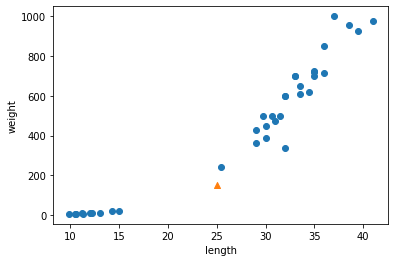

In [19]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [20]:
distances, indexes = Kn.kneighbors([[25,150]])

Text(0, 0.5, 'weight')

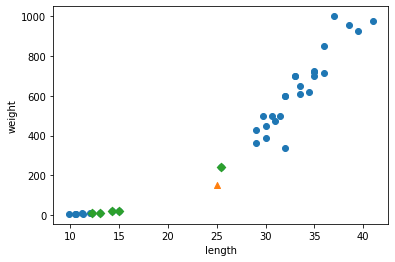

In [21]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')

In [22]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [23]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [24]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


Text(0, 0.5, 'weight')

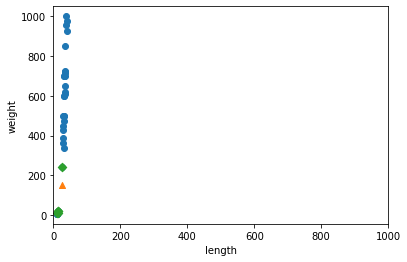

In [25]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlim((0,1000)) #x축의 범위 지정, x,y축의 범위가 다름 x축 :(10~40) y축 : (0~1000)
plt.xlabel('length')
plt.ylabel('weight')

* 데이터 전처리 : 데이터를 표현하는 기준을 설정하는 것

In [26]:
mean = np.mean(train_input, axis=0) #np.mean() : 평균을 계산
std = np.std(train_input, axis=0) #np.std() : 표준편차를 계산

In [27]:
print(mean,std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [29]:
train_scaled = (train_input - mean)/std #표준점수 : 원본 데이터 - 평균 / 표준편차

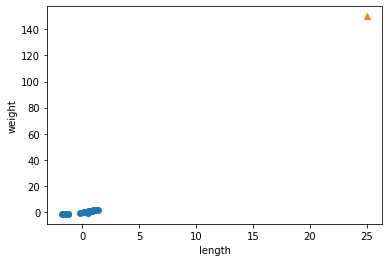

In [30]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25,150,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show(m)

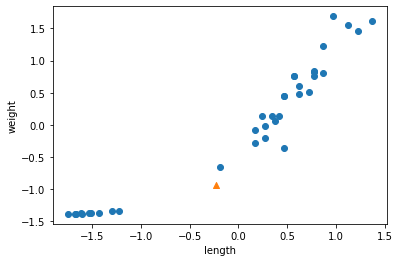

In [32]:
new = ([25,150]-mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [35]:
test_scaled = (test_input - mean)-std

Kn.score(test_scaled, test_target)

1.0

In [37]:
print(Kn.predict([new]))

[1.]


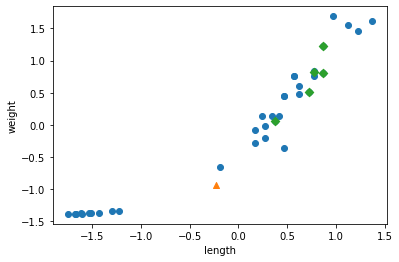

In [38]:
distances, indexes = Kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1],marker='^')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()



*   데이터 전처리 : 머신러닝 모델에 훈련 데이터를 주입하기 전, 가공하는 단계
*   표준점수 : 훈련 세트의 스케일을 바꾸기 위해 특성의 평균을 빼고 표준점수로 나누는것
* 브로드캐스팅 : 크기가 다른 numpy배열에서 자동으로 사칙 연산을 모든 행이나 열로 확장하여 수행하는 기능

<h3>scifit-learn</h3>
train_test_split() : 훈련 데이터를 train set, test set으로 나누는 함수이다.
straify 매개변수에 target데이터를 전달하면 클래스 비율을 맞추어 준다.
Kneighbors() : 입력한 데이터에 가까운 이웃 샘플의 인덱스 반환

